### Bank Term Deposit Subscription

**About dataset:**The dataset is from a bank, using which we have to predict whether the subject subscribes to a term deposit or not.<br/>

**Attributes:**
The dataset has the following attributes:<br/>
1  - age (numeric)<br/>
2  - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                    "blue-collar","self-employed","retired","technician","services"). <br/>
3  - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)<br/>
4  - education (categorical: "unknown","secondary","primary","tertiary")<br/>
5  - default: has credit in default? (binary: "yes","no")<br/>
6  - balance: average yearly balance, in euros (numeric) <br/>
7  - housing: has housing loan? (binary: "yes","no")<br/>
8  - loan: has personal loan? (binary: "yes","no")<br/>
9  - contact: contact communication type (categorical: "unknown","telephone","cellular") <br/>
10 - day: last contact day of the month (numeric)<br/>
11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")<br/>
12 - duration: last contact duration, in seconds (numeric)<br/>
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br/>
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client      was not previously contacted)<br/>  
15 - previous: number of contacts performed before this campaign and for this client (numeric)<br/>
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")<br/>
**Response Variable (desired target):**<br/>
17 - y - has the client subscribed to a __term deposit?__ (binary: "yes","no")

**Importing packages**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os


In [3]:
# to remove teh printing barrier
pd.set_option('display.max_columns', None)

In [4]:
# TO print multiple outputs in single line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [132]:
bank_data = pd.read_csv("attachment_bank.csv")
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [133]:
bank_data = bank_data[['age', 'job', 'marital',  'y']]

In [134]:
df_2 = bank_data[['age', 'job', 'marital',  'y']].copy()

Top 6 rows of dataset

**Let's see the datatypes of the variables**

In [135]:
bank_data.dtypes

age         int64
job        object
marital    object
y          object
dtype: object

In [136]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   age      4521 non-null   int64 
 1   job      4521 non-null   object
 2   marital  4521 non-null   object
 3   y        4521 non-null   object
dtypes: int64(1), object(3)
memory usage: 141.4+ KB


**Observations:** <br/>
No. of rows: 4521, No.of columns: 17
        

### Question: Perform Descriptive Statistics on the dataset

**Descriptive statistics of numerical variables**

In [137]:
bank_data.describe()

,age
count,4521.000000
mean,41.170095
std,10.576211
min,19.000000
25%,33.000000
50%,39.000000
75%,49.000000
max,87.000000


**Observations:**Fortunately, there are no missing values.

### Question: Remove missing values from the data frame if any

In [138]:
bank_data.isnull().sum()

age        0
job        0
marital    0
y          0
dtype: int64

In [139]:
bank_data['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [140]:
bank_data['y'].replace({'yes':1,'no':0}, inplace=True)

Let's see the how the numeric variables distributed

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

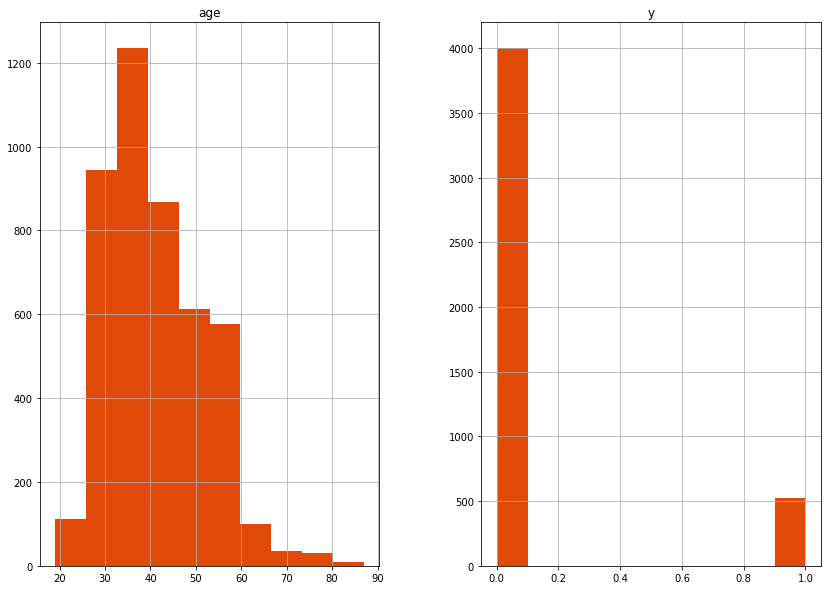

In [141]:
import matplotlib.pyplot as plt
bank_data.hist(bins=10, figsize=(14,10), color='#E14906')
plt.show()

**Label Encoding**

In [142]:
from sklearn.preprocessing import LabelEncoder
le_job = LabelEncoder()
bank_data['job'] = le_job.fit_transform(bank_data['job'])

le_martial = LabelEncoder()
bank_data['marital'] = le_martial.fit_transform(bank_data['marital'])


# encoding_list = ['job', 'marital', 'y']
# bank_data[encoding_list] = bank_data[encoding_list].apply(LabelEncoder().fit_transform)

In [143]:
le_job.transform(['unemployed'])


array([10])

In [144]:
df_2['job']

0          unemployed
1            services
2          management
3          management
4         blue-collar
            ...      
4516         services
4517    self-employed
4518       technician
4519      blue-collar
4520     entrepreneur
Name: job, Length: 4521, dtype: object

**Target Variable**

In [145]:
y = bank_data['y'].values
X = bank_data.drop('y',1)

### Question: Perform EDA and find any correlation

**Correlation**

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:>

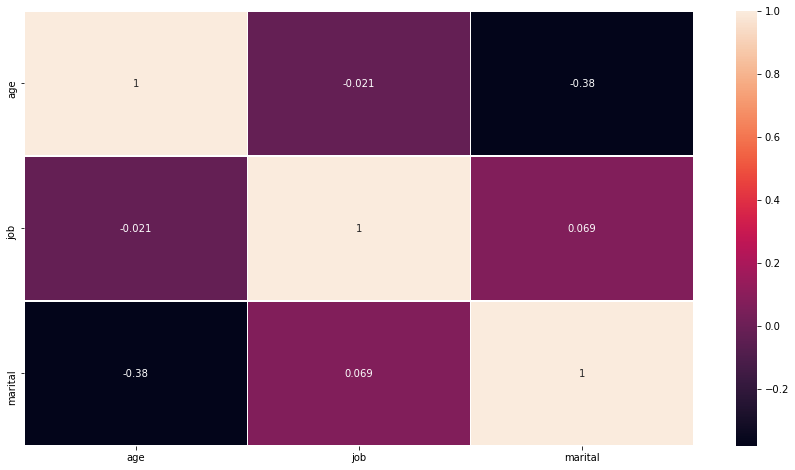

In [146]:
plt.figure(figsize=(15,8))
sns.heatmap(X.corr(),annot=True, linewidth=0.5)
plt.show()

**Observations:** From the above graph, it is noted that pdays and previous are highly correlated to each other.

**Let's see some plots to understand the data**

**Data Partition**

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Question: Perform classification using Logistic Regression and analyse the metrics

In [148]:
#Logistice regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [149]:
logreg.predict(np.array([30,9,2]).reshape(1, -1))

array([0], dtype=int64)

**Predictions**

In [150]:
y_log_pred_test = logreg.predict(X_test)
y_log_pred_train = logreg.predict(X_train)

**Confustion Matrix**

In [151]:
metrics.confusion_matrix(y_test, y_log_pred_test)

array([[1196,    0],
       [ 161,    0]], dtype=int64)

**Train and Test accuracy**

In [152]:
print(metrics.accuracy_score(y_test, y_log_pred_test))#test accuracy
print(metrics.accuracy_score(y_train, y_log_pred_train))#train accuracy

0.8813559322033898
0.8862199747155499


**Classification report**

In [153]:
cl=classification_report(y_test,y_log_pred_test)
print(cl)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1196
           1       0.00      0.00      0.00       161

    accuracy                           0.88      1357
   macro avg       0.44      0.50      0.47      1357
weighted avg       0.78      0.88      0.83      1357



C:\Users\chait\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\chait\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\chait\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [154]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import plotly.graph_objects as go

In [162]:
@interact(marital = widgets.Dropdown(options = sorted(df_2.marital.unique()), description='Marital:'),
          job = widgets.Dropdown(options = sorted(df_2.job.unique()), description='job:'),
          age = widgets.IntText(value=0, description='age:')
         
        )

def predict_score(marital, job, age):
    

    

    predict_val = logreg.predict(np.array([age,le_martial.transform([marital]), le_job.transform([job])]).reshape(1, -1))
    prob_val = logreg.predict_proba(np.array([age,le_martial.transform([marital]), le_job.transform([job])]).reshape(1, -1))[0][1]
    
    # Construct dashboard
    fig = go.Figure()
    fig.update_layout(
                    autosize=False,
                    width=1200,
                    height=650,
                    )
    
    # Display enterprise level emission
    fig.add_trace(
        go.Indicator(
        mode = "number",
        value = predict_val[0],
        domain = {'x': [0, 0.3], 'y': [0.65, 1]},
        title={'text': "Predicted Value<br><span style='font-size:0.8em;color:gray'>0 means no and 1 means yes</span>",
              'font.size': 20}))
    
    # Display percentile of enterprise level emission
    fig.add_trace(
        go.Indicator(
        mode = "gauge+number",
        value = prob_val * 100,
        domain = {'x': [0, 0.3], 'y': [0, 0.65]},
        gauge = {'axis': {'range': [0, 100]},
                 'steps' : [
                 {'range': [0, 20], 'color': "green"},
                 {'range': [20, 40], 'color': "lightgreen"},
                 {'range': [40, 60], 'color': "greenyellow"},
                 {'range': [60, 80], 'color': "salmon"},
                 {'range': [80, 100], 'color': "red"}],
                 'bar': {'color': "lightblue",
                         'thickness': 0.35},},
        title={'text': 'Prediction Probability',
              'font.size': 20}))
    

    
    
    fig.show()

interactive(children=(Dropdown(description='Marital:', options=('divorced', 'married', 'single'), value='divor…